## (Clickbait Title)
Michelle Yaochai | Zheng Chong, Emily | Marvin Dragon Choo | Brian Ku \
(Date)

In [2]:
# Importing all necessary libraries
import numpy as np
from matplotlib import pyplot as plt
# import random

## Introduction

Central Limit Theorem (CLT) is ....

CLT allows us to ....

This notebook is split into a few parts.

* In Part A, we illustrate CLT and show that it works on any arbitrary distribution, and calculate some useful parameters
  * Scoping to also illustrate the cases where it fails, such as when pdf has infinite variance/undefined mean
* In Part B, we demonstrate the utility of CLT by simulating various physical systems, and validating key parameters against those predicted by CLT, and use it to calculate physical properties such as diffusion coefficients, ...
* In ... (TODO)

## Part A: Illustration

TODO: Paraphrase

The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution.

Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.

A key aspect of CLT is that the average of the sample means and standard deviations will equal the population mean and standard deviation.

A sufficiently large sample size can predict the characteristics of a population more accurately.

explain all the rules

## Illustrating CLT using Python

### Coin Flips


ok so basically for coin flips using a fair coin, the probability density of landing on heads or tails can be calculated using the binomial equation below:

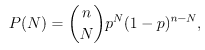

where p is the probability, n is the number of trials ran, and N is the number of successes. 

From this, we can see that we need to assign two variables, n and p. For the purpose of this simulation, 
p = 0.5, since we're using a fair coin, there is equal (0.5) chance of the coin landing on either side
n = 10, 10 bins in a histogram is a nice number

in order for the results to make sense, we need to assign a value to the sides. so in this notebook, all 1s will represent heads and all 0s will represent tails!

#### Here we will generate one sample of carrying out 10 coin flips
feel free to run this code repeatedly to see how the results of each coin flip in the sample changes every time. This demonstrates the random behavior of the 'coin' and are examples of what will be in the 100 samples in the next section.

In [5]:
# assign values as stated above
p = 0.5
n = 10

# array pouch to drop the results of the trials into
flip_results = []

# creating the coinflip function
def coinflip(p):
    result = np.random.binomial(1,p) 
    # returns 0 or 1. p is in the interval [0,1] 
    # and represents the probability of the function returning a 1
    return result

# carrying out n number of flips and storing their results
for i in range(n):
    flip_results.append(coinflip(p))

# checking the results of the flips! 
print(flip_results)

# in order to plot the samples later, 
# we need to quantify the results of each sample
# so, let's count how many heads (1) there are in the results!
num_heads = sum(flip_results) # since the heads are represented by 1 and tails by 0, the sum of the list gives us the number of successes!
print(f"Out of 10 coin flips, {num_heads} were heads!")

# since there are only 2 results, taking the total and minusing the number of heads gives us the number of tails
num_tails = n - num_heads
print(f"Out of 10 coin flips, {num_tails} were tails!")

[0, 0, 0, 1, 1, 1, 0, 1, 1, 1]
Out of 10 coin flips, 6 were heads!
Out of 10 coin flips, 4 were tails!


#### Here we will generate 100 samples and plot them
coin flip experimental set-up taken from https://statmagic.info/Tutorials/intro-part-3.html

In [ ]:
# TODO redo this

If you've gotten bored of just reading, here's your chance! We would like to demonstrate that the more samples you have, the more your distribution will represent a normal distribution. We just need your help in changing the value of s to anything you would like, and rerunning the cell. Try using 10, 100, 1000, 10000. Do you see the difference? 

[break for you to try the ^^]

Now that you've played around with the values, I'm sure you've seen how when s=10, the histogram barely looks anything like a hill, while at 10000, the histogram Always shows normal distribution. 

(array([  1.,  13.,  41., 121., 195., 244., 202., 124.,  47.,  10.,   2.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <BarContainer object of 11 artists>)

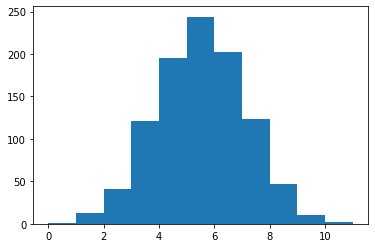

In [ ]:
# ok now we've seen it, it's time to do it large-scale.
# creating a pouch to hold all our results
all_results = []

# assign values as stated above (putting it here makes it easier to check & change)
p = 0.5 # probability
n = 10 # number of coin flips per sample
s = 1000 # number of samples

# creating the coinflip function
def coinflip(p):
    result = np.random.binomial(1,p) 
    # returns 0 or 1. p is in the interval [0,1] 
    # and represents the probability of the function returning a 1
    return result

for j in range(s): # running through s number of samples
    for i in range(n): # doing n coin flips for each sample
        if i==0:
            all_results.append([]) # making a new sample pouch
        
        all_results[j].append(coinflip(p))

# counting the number of heads for each sample
samples_heads = [] # creating a pouch to hold all the counts
for j in range(s):
    num_heads = sum(all_results[j])
    samples_heads.append(num_heads)

# these are the number of heads you would get tossing a coin 10 times, if you experimented with it 100 times
#print(samples_heads) 

#presenting distribution in histogram
plt.hist(samples_heads, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

If you've gotten bored of just reading, here's your chance! We would like to demonstrate that the more samples you have, the more your distribution will represent a normal distribution. We just need your help in changing the value of s to anything you would like, and rerunning the cell. Try using 10, 100, 1000, 10000. Do you see the difference? 

[break for you to try the ^^]

Now that you've played around with the values, I'm sure you've seen how when s=10, the histogram barely looks anything like a hill, while at 10000, the histogram Always shows normal distribution. 

### Dice Rolls

another difference is that we now have 6 sides so now we need to generate any number from 1 to 6. we're going to do this with the random function

(array([   7.,   37.,  203.,  563., 1231., 1900., 2202., 1877., 1198.,
         548.,  186.,   48.]),
 array([16., 19., 22., 25., 28., 31., 34., 37., 40., 43., 46., 49., 52.]),
 <BarContainer object of 12 artists>)

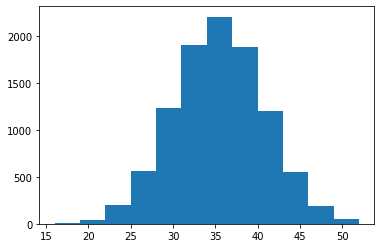

In [ ]:
# ok now we've seen it, it's time to do it large-scale.
# creating a pouch to hold the results of all our rolls
all_rolls = []

# assign values as stated above (putting it here makes it easier to check & change)
n = 10 # number of dice rolls per sample
s = 10000 # number of samples

# creating the dice roll function
def diceroll():
    result = random.randint(1,6) 
    # taken from https://medium.com/an-amygdala/how-to-simulate-a-dice-roll-and-guess-the-result-in-python-9785079af6f3#:~:text=Use%20Python's%20random%20module%20to,be%20imported%20into%20your%20IDE.
    # returns any integer between 1 and 6, including 1 and 6
    return result

for j in range(s): # running through s number of samples
    for i in range(n): # doing n dice rolls for each sample
        if i==0:
            all_rolls.append([]) # making a new sample pouch
        
        all_rolls[j].append(diceroll())

# calculting the sum of the dice roll results for each sample
samples_rolls = [] # creating a pouch to hold all the sums
for j in range(s):
    sum_roll = sum(all_rolls[j])
    samples_rolls.append(sum_roll)

#presenting distribution in histogram
plt.hist(samples_rolls, bins = 12)

## Part B: Demonstration

Random Walk
1D Random Walk
* In a simple one-dimentional random walk, an object at the origin along a linear axis can either move a distance of +1 or -1 with equal probability. This will be called a step. When the object moves N number of steps, assuming that the steps are independent N is large enough, the probability distribution of the object's position approaches a Normal distribution.